In [21]:
# Create your first MLP in Keras
from keras.models import Sequential 
from keras.layers import Dense, Flatten, Softmax
from keras.layers import Dense
import numpy
import pandas as pd

##
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# evaluation on test data
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
from sklearn.metrics import classification_report,confusion_matrix

In [22]:

# load pima indians dataset
dataset = numpy.loadtxt("..\dataset\home.csv", delimiter=",")



### convert dataset as pandas dataframe

In [23]:
df = pd.DataFrame(dataset, columns=["square_feet", "bedrooms", "price"])
df

,square_feet,bedrooms,price
0,2104.0,3.0,399900.0
1,1600.0,3.0,329900.0
2,2400.0,3.0,369000.0
3,1416.0,2.0,232000.0
4,3000.0,4.0,539900.0
5,1985.0,4.0,299900.0
6,1534.0,3.0,314900.0
7,1427.0,3.0,198999.0
8,1380.0,3.0,212000.0
9,1494.0,3.0,242500.0


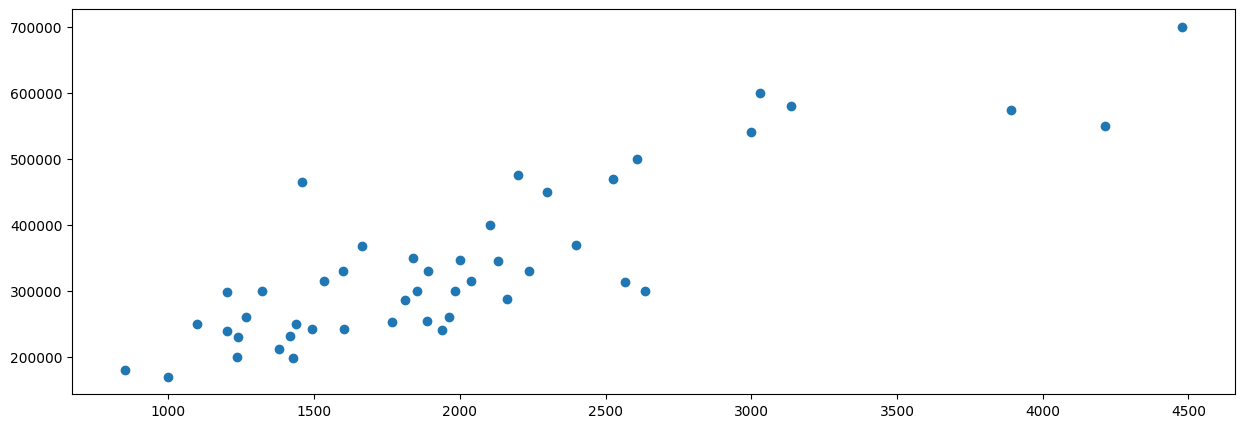

In [24]:
## plot the data square_feet vs Price 

plt.figure(figsize=(15,5))

plt.scatter(df["square_feet"], df["price"])
plt.show()



In [25]:
df_x = df[["square_feet", "bedrooms"]]
df_y = df["price"]


In [26]:

# Features
X = df_x

# Label
y = df_y
# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

### create a model

In [27]:
# create model
model = Sequential()
model.add(Dense(2, input_dim=2, activation='relu'))
model.add(Dense(2, activation='relu'))
# model.add(Dense(1, activation='softmax'))
model.add(Dense(1, activation='linear'))  # Use linear activation for regression
# model.add(Dense(1)) 
model.summary()

c:\genai\genai_4\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15 (60.00 B)

 Trainable params: 15 (60.00 B)

 Non-trainable params: 0 (0.00 B)

In [28]:
for i, layer in enumerate(model.layers):
    if hasattr(layer, 'kernel_initializer'):
        print(f"Layer {i} - {layer.name}:")
        print("  Kernel Initializer:", layer.kernel_initializer)
        print()

Layer 0 - dense_9:
  Kernel Initializer: <keras.src.initializers.random_initializers.GlorotUniform object at 0x00000205E8F6F290>

Layer 1 - dense_10:
  Kernel Initializer: <keras.src.initializers.random_initializers.GlorotUniform object at 0x00000205F1A79790>

Layer 2 - dense_11:
  Kernel Initializer: <keras.src.initializers.random_initializers.GlorotUniform object at 0x00000205F1530050>



In [29]:
# Compile model
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile(optimizer='adam',loss='mse')
#model.compile(optimizer='adam', loss='mse')
print("\n📌 Initial Weights:")
for layer in model.layers:
    weights = layer.get_weights()
    if weights:
        print(f"Layer {layer.name} weights:\n", weights[0])
        print(f"Layer {layer.name} biases:\n", weights[1])


📌 Initial Weights:
Layer dense_9 weights:
 [[ 0.5506792  1.1570011]
 [ 1.1334654 -0.9042883]]
Layer dense_9 biases:
 [0. 0.]
Layer dense_10 weights:
 [[-0.23425621 -0.8161732 ]
 [ 0.47757733  0.07605481]]
Layer dense_10 biases:
 [0. 0.]
Layer dense_11 weights:
 [[ 0.00083852]
 [-0.7037222 ]]
Layer dense_11 biases:
 [0.]


In [30]:
# Fit the model
# model.fit(df_x, df_y, epochs=170, batch_size=10 ,verbose=0)
# model.compile(optimizer='adam',loss='mse' , auto_scale_loss=False)
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=5,epochs=170,verbose=0)

#evaluate the model
scores = model.evaluate(X_train, y_train)
model
# print("\n%s: %.2f%%" % (model.metrics_names, scores[1]*100))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - loss: 116401356800.0000


<Sequential name=sequential_3, built=True>

c:\genai\genai_4\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


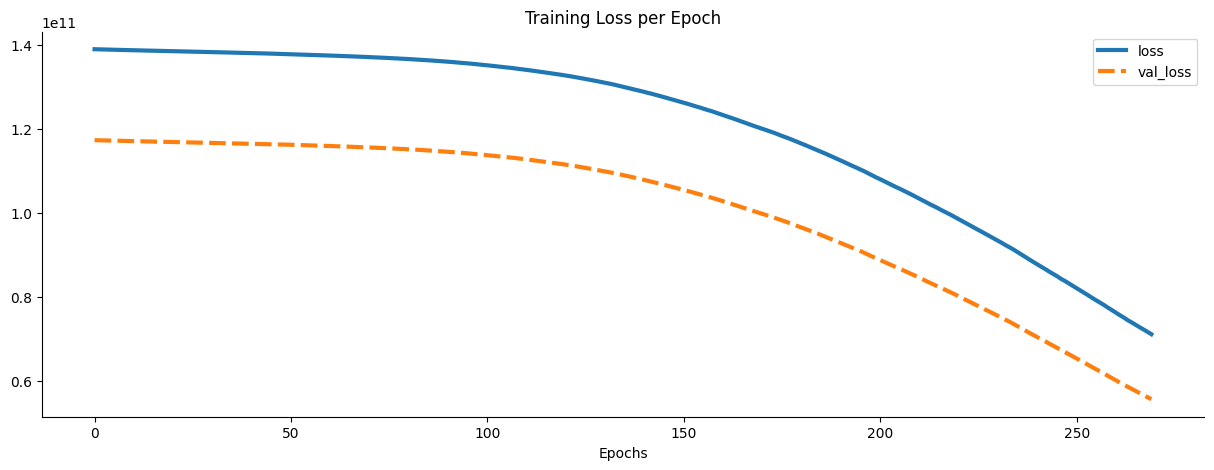

In [31]:
# create model
model = Sequential()
model.add(Dense(4, input_dim=2))
# model.add(Dense(2, activation='relu'))
model.add(Dense(2) )

model.add(Dense(1, activation='linear'))  # Use linear activation for regression
# model.add(Dense(1)) 
# model.summary()
df_x = df[["square_feet", "bedrooms"]]
df_y = df["price"]

model.compile(optimizer='adam',loss='mse' , auto_scale_loss=False)
model.fit(x=df[["square_feet", "bedrooms"]] ,y=df["price"],validation_split= 0.3 ,
        #   validation_data=(X_test,y_test),
          batch_size=10,
          epochs=270,
          verbose=0)

losses = pd.DataFrame(model.history.history)

plt.figure(figsize=(15,5))
sns.lineplot(data=losses,lw=3)
plt.xlabel('Epochs')
plt.ylabel('')
plt.title('Training Loss per Epoch')
sns.despine()

c:\genai\genai_4\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


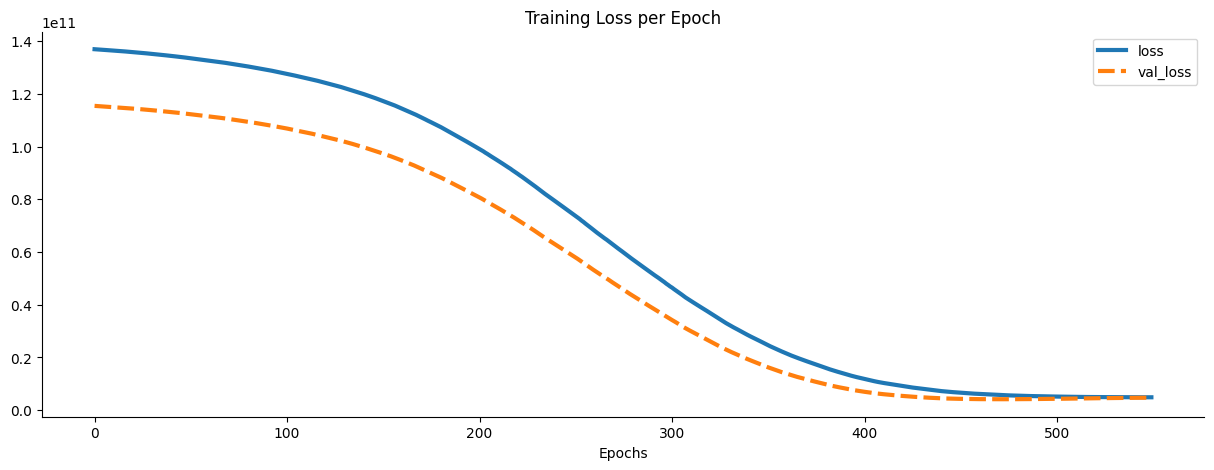

In [41]:
# create model
model_2 = Sequential()
model_2.add(Dense(4, input_dim=2 ))
# model.add(Dense(2, activation='relu'))
model_2.add(Dense(2) )

model_2.add(Dense(1, activation='linear'))  # Use linear activation for regression
# model.add(Dense(1)) 
# model.summary()
df_x = df[["square_feet", "bedrooms"]]
df_y = df["price"]

model_2.compile(optimizer='adam',loss='mse' , auto_scale_loss=False)
model_2.fit(x=df[["square_feet", "bedrooms"]] ,y=df["price"],validation_split= 0.3 ,
        #   validation_data=(X_test,y_test),
          batch_size=10,
          epochs=550,
          verbose=0)

losses = pd.DataFrame(model_2.history.history)

plt.figure(figsize=(15,5))
sns.lineplot(data=losses,lw=3)
plt.xlabel('Epochs')
plt.ylabel('')
plt.title('Training Loss per Epoch')
sns.despine()

### check the default layer used in model model_2

In [61]:
for i, layer in enumerate (model_2.layers):
    print (i, layer)
    try:
        print ("    ",layer.activation)
    except AttributeError:
        print('   no activation attribute')

0 <Dense name=dense_21, built=True>
     <function linear at 0x00000205D49BAB60>
1 <Dense name=dense_22, built=True>
     <function linear at 0x00000205D49BAB60>
2 <Dense name=dense_23, built=True>
     <function linear at 0x00000205D49BAB60>


### check the weights used in model

In [59]:
for layer in model_2.layers:
    print(f"Layer: {layer.name}")
    weights = layer.get_weights()
    if weights:
        print(f"  Weights shape: {weights[0].shape}")
        print(f"  Weights: \n{weights[0]}")
        print(f"  Biases shape: {weights[1].shape}")
        print(f"  Biases: \n{weights[1]}")
    else:
        print("  No weights (e.g., Dropout or Flatten layer)")


Layer: dense_21
  Weights shape: (2, 4)
  Weights: 
[[-1.9347922  2.6590397 -2.2953427  2.2945387]
 [-2.747558   2.0310054 -1.6262628  2.6503315]]
  Biases shape: (4,)
  Biases: 
[-2.4123833  2.2124891 -2.206047   2.0234954]
Layer: dense_22
  Weights shape: (4, 2)
  Weights: 
[[-1.9037528 -2.4573479]
 [ 3.0392683  2.5108552]
 [-2.6996515 -3.165586 ]
 [ 2.2374327  1.8688527]]
  Biases shape: (2,)
  Biases: 
[1.7970024 1.7509186]
Layer: dense_23
  Weights shape: (2, 1)
  Weights: 
[[3.3987343]
 [3.8509972]]
  Biases shape: (1,)
  Biases: 
[1.4013784]


### check the model

In [46]:
import numpy as np
# Predict diabetes for new samples (3 new patients)
# samples = np.array([[2000,3,347000],
# [                   1890,3,329999]])   # Sample 3
samples = np.array([[2000,3],
                    [1890,3]])   # Sample 3



In [ ]:
# Predict diabetes (returns probabilities)
predictions = model_2.predict(samples)

# Convert probabilities to class labels (0 or 1)
predicted_classes = (predictions > 0.5).astype(int)
print("***********************************")
print( f"predicated value for square feet {samples[0][0]} and room {samples[0][1]} is {predictions[0]}   -- Orginal value 347000 ")
print( f"predicated value for square feet {samples[1][0]} and room {samples[1][1]} is {predictions[1]}   -- Orginal value 329999 ")

print("***********************************")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
***********************************
[[334671.16]
 [316299.9 ]]
predicated value for square feet 2000 and room 3 is [334671.16]   -- Orginal value 347000 
predicated value for square feet 1890 and room 3 is [316299.9]   -- Orginal value 329999 
***********************************
[1 1]
